In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [1]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, KFold

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, KBinsDiscretizer, PolynomialFeatures

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, RANSACRegressor, Ridge, Lasso, LinearRegression

from sklearn.metrics import recall_score, precision_score, f1_score, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_curve, precision_recall_curve, PrecisionRecallDisplay, make_scorer
from sklearn.metrics import mean_squared_error

from sklearn.compose import ColumnTransformer, make_column_selector,make_column_transformer, TransformedTargetRegressor
import category_encoders as ce
from scipy import stats

from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, mean_absolute_error, r2_score, make_scorer

from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, KBinsDiscretizer


### Область работы 2 (поиск  модели .... )

In [2]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

In [3]:
df = pd.read_csv(path_train)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.55,Ideal,I,SI1,61.7,55.0,1134,5.29,5.31,3.27
1,0.94,Premium,E,SI1,62.4,56.0,4580,6.27,6.24,3.90
2,0.33,Premium,E,SI2,60.0,59.0,594,4.49,4.47,2.69
3,0.31,Ideal,D,VS2,59.4,56.0,879,4.45,4.40,2.63
4,2.01,Very Good,H,SI1,62.8,59.0,17759,7.99,8.04,5.03


## Обработка данных

In [4]:
display(df.info())
display(df.describe())
display(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


None

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.00000
mean,0.797227,61.746219,57.451551,3938.457274,5.728667,5.732720,3.53753
std,0.474440,1.420742,2.230915,3998.851904,1.123597,1.153284,0.70956
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.00000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.91000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.53000
75%,1.040000,62.500000,59.000000,5324.500000,6.540000,6.530000,4.03000
max,5.010000,78.200000,95.000000,18818.000000,10.740000,58.900000,31.80000


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
df = df.drop_duplicates(keep='first')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.55,Ideal,I,SI1,61.7,55.0,1134,5.29,5.31,3.27
1,0.94,Premium,E,SI1,62.4,56.0,4580,6.27,6.24,3.90
2,0.33,Premium,E,SI2,60.0,59.0,594,4.49,4.47,2.69
3,0.31,Ideal,D,VS2,59.4,56.0,879,4.45,4.40,2.63
4,2.01,Very Good,H,SI1,62.8,59.0,17759,7.99,8.04,5.03
...,...,...,...,...,...,...,...,...,...,...
40450,1.50,Very Good,D,SI1,60.7,62.0,11442,7.30,7.33,4.44
40451,1.51,Ideal,D,SI1,61.9,57.0,11834,7.35,7.42,4.57
40452,0.42,Ideal,G,SI2,60.9,56.0,971,4.87,4.89,2.97
40453,2.05,Premium,E,SI2,59.7,59.0,17237,8.39,8.27,4.97


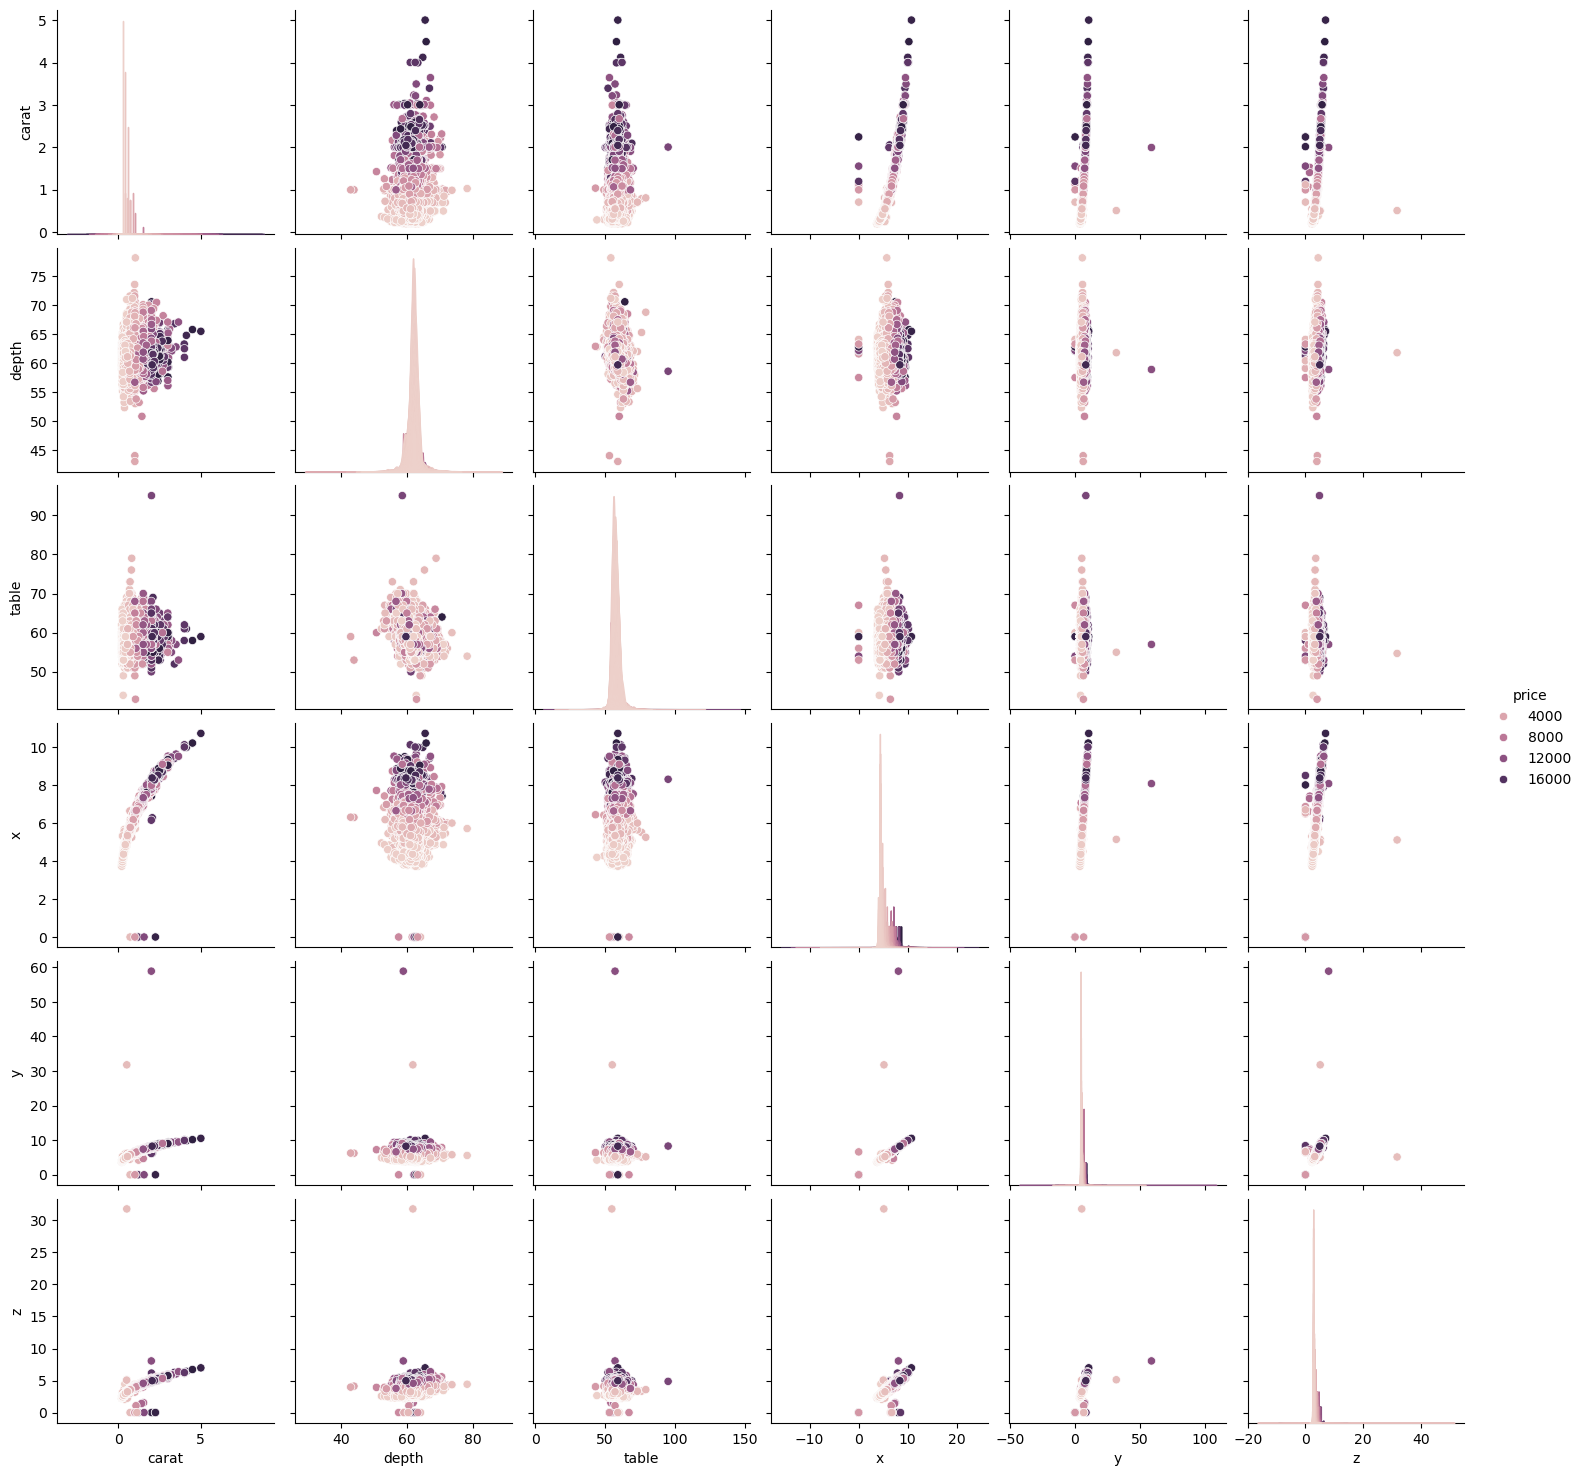

In [6]:
sns.pairplot(df, hue='price')

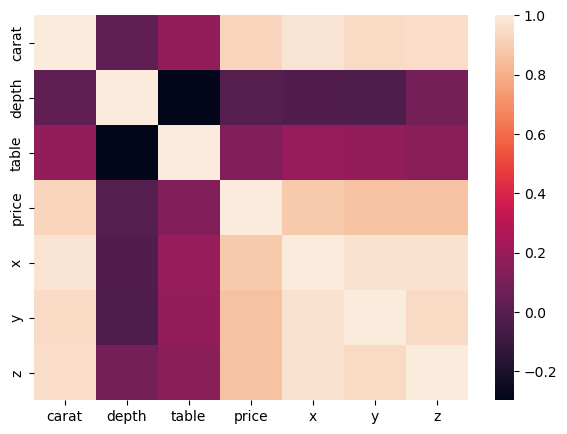

In [7]:
num_cols = df.select_dtypes(include=['float64', 'uint64', 'int64'])
corr = num_cols.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(corr)
plt.show()

In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,40377.00000,40377.000000,40377.000000,40377.000000,40377.000000,40377.000000,40377.000000
mean,0.79713,61.745600,57.452126,3938.759690,5.728777,5.732886,3.537583
std,0.47404,1.420043,2.231121,3998.041468,1.122689,1.152500,0.709028
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,946.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.000000,6.540000,6.530000,4.030000
max,5.01000,78.200000,95.000000,18818.000000,10.740000,58.900000,31.800000


### Нули в x, y, z

In [9]:
display(df[df['x'] == 0])
display(df[df['y'] == 0])
display(df[df['z'] == 0])

,carat,cut,color,clarity,depth,table,price,x,y,z
4817,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
13661,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
15977,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
23017,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
25662,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
32084,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
35064,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0


,carat,cut,color,clarity,depth,table,price,x,y,z
13661,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
15977,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
23017,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
25662,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
32084,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
35064,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0


,carat,cut,color,clarity,depth,table,price,x,y,z
4817,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
7928,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10418,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0
11203,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0
13661,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
15977,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
18359,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
23017,1.20,Premium,D,VVS1,62.1,59.0,15686,0.00,0.00,0.0
25662,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.0
32084,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.0


In [10]:
# # есть ли смысл заполнять их? не знаю
# # пока удалить 0 в x y z 
#df = df[(df['x'] != 0) & (df['y'] != 0) & (df['z'] != 0)]
#df.describe()

### Выбросы в у

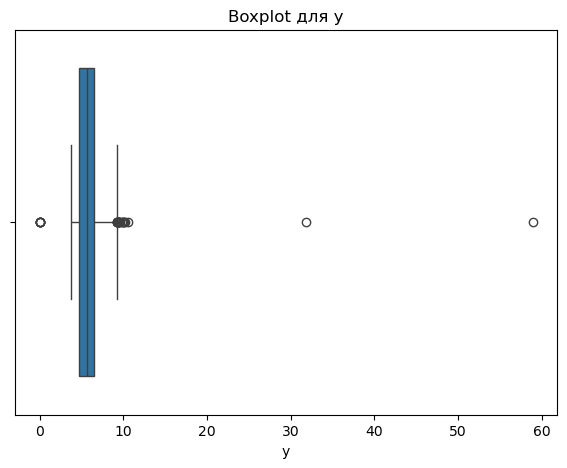

In [11]:
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['y'])
plt.title('Boxplot для y')
plt.xlabel('y')
plt.show()

In [12]:
display(df[df['y'] > 30]) # строки с выбросами
display(df[df['carat'] == 0.5].head()) # посмотрим на остальные строки с таким же значением carat
display(df[df['carat'] == 2].head())

,carat,cut,color,clarity,depth,table,price,x,y,z
2455,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12
16230,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06


,carat,cut,color,clarity,depth,table,price,x,y,z
32,0.5,Good,E,VS2,63.4,59.0,1407,5.03,5.06,3.20
61,0.5,Ideal,H,VS2,62.3,55.0,1921,5.09,5.12,3.18
71,0.5,Ideal,E,SI1,62.2,57.0,1415,5.11,5.05,3.16
94,0.5,Good,D,SI1,63.6,54.0,1436,5.02,5.08,3.21
114,0.5,Good,G,VVS2,63.6,57.0,1858,5.08,5.04,3.22


,carat,cut,color,clarity,depth,table,price,x,y,z
43,2.0,Premium,I,VS2,58.5,61.0,14763,8.28,8.19,4.82
150,2.0,Premium,J,SI1,62.2,59.0,12308,7.97,7.92,4.94
469,2.0,Premium,H,SI1,60.1,61.0,15984,8.13,8.10,4.88
570,2.0,Good,G,SI1,63.6,61.0,17405,7.90,7.83,5.00
841,2.0,Ideal,I,SI1,62.9,59.0,15218,8.08,7.95,5.05


In [13]:
#думаю, все же ошибки в данных => удалить
df = df[df['y'] < 30]
df.describe()

,carat,depth,table,price,x,y,z
count,40375.000000,40375.000000,40375.000000,40375.000000,40375.000000,40375.000000,40375.000000
mean,0.797107,61.745669,57.452198,3938.600991,5.728733,5.730923,3.537432
std,0.474012,1.420008,2.231141,3997.917813,1.122651,1.114214,0.708644
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,946.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5325.500000,6.540000,6.530000,4.030000
max,5.010000,78.200000,95.000000,18818.000000,10.740000,10.540000,31.800000


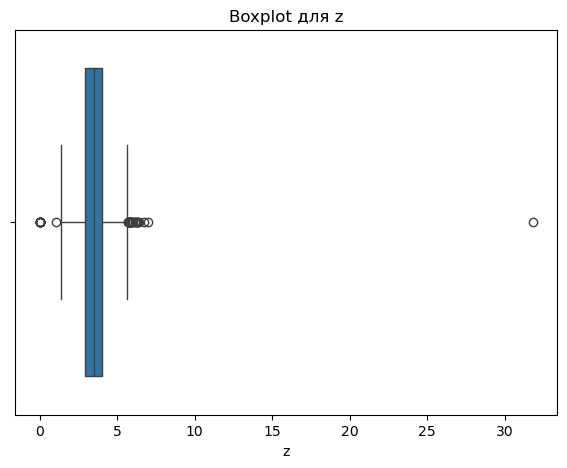

In [14]:
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['z'])
plt.title('Boxplot для z')
plt.xlabel('z')
plt.show()

In [15]:
df = df[df['z'] < 30] # ???????
df.describe()

,carat,depth,table,price,x,y,z
count,40374.000000,40374.000000,40374.000000,40374.00000,40374.000000,40374.000000,40374.000000
mean,0.797114,61.745668,57.452266,3938.64975,5.728748,5.730938,3.536732
std,0.474016,1.420025,2.231127,3997.95532,1.122661,1.114224,0.694553
min,0.200000,43.000000,43.000000,326.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,946.00000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.00000,5.690000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5325.75000,6.540000,6.530000,4.030000
max,5.010000,78.200000,95.000000,18818.00000,10.740000,10.540000,6.980000


### Проверяем категориальные столбцы

In [16]:
print(f'Уникальные значения в столбце cut: {df['cut'].unique()}')
print(f'Уникальные значения в столбце color: {df['color'].unique()}')
print(f'Уникальные значения в столбце clarity: {df['clarity'].unique()}')

Уникальные значения в столбце cut: ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
Уникальные значения в столбце color: ['I' 'E' 'D' 'H' 'F' 'G' 'J']
Уникальные значения в столбце clarity: ['SI1' 'SI2' 'VS2' 'VS1' 'VVS1' 'VVS2' 'IF' 'I1']


## Каратная цикличность

(0.0, 3.0)

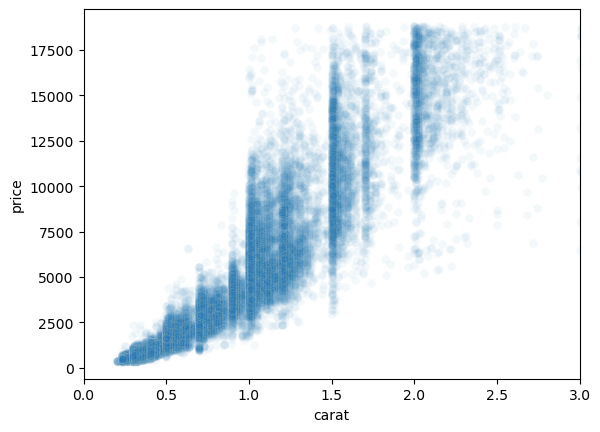

In [17]:
sns.scatterplot(data = df, x = 'carat', y = 'price', alpha=0.05);
plt.xlim(0,3)

## Нелинейность роста цены

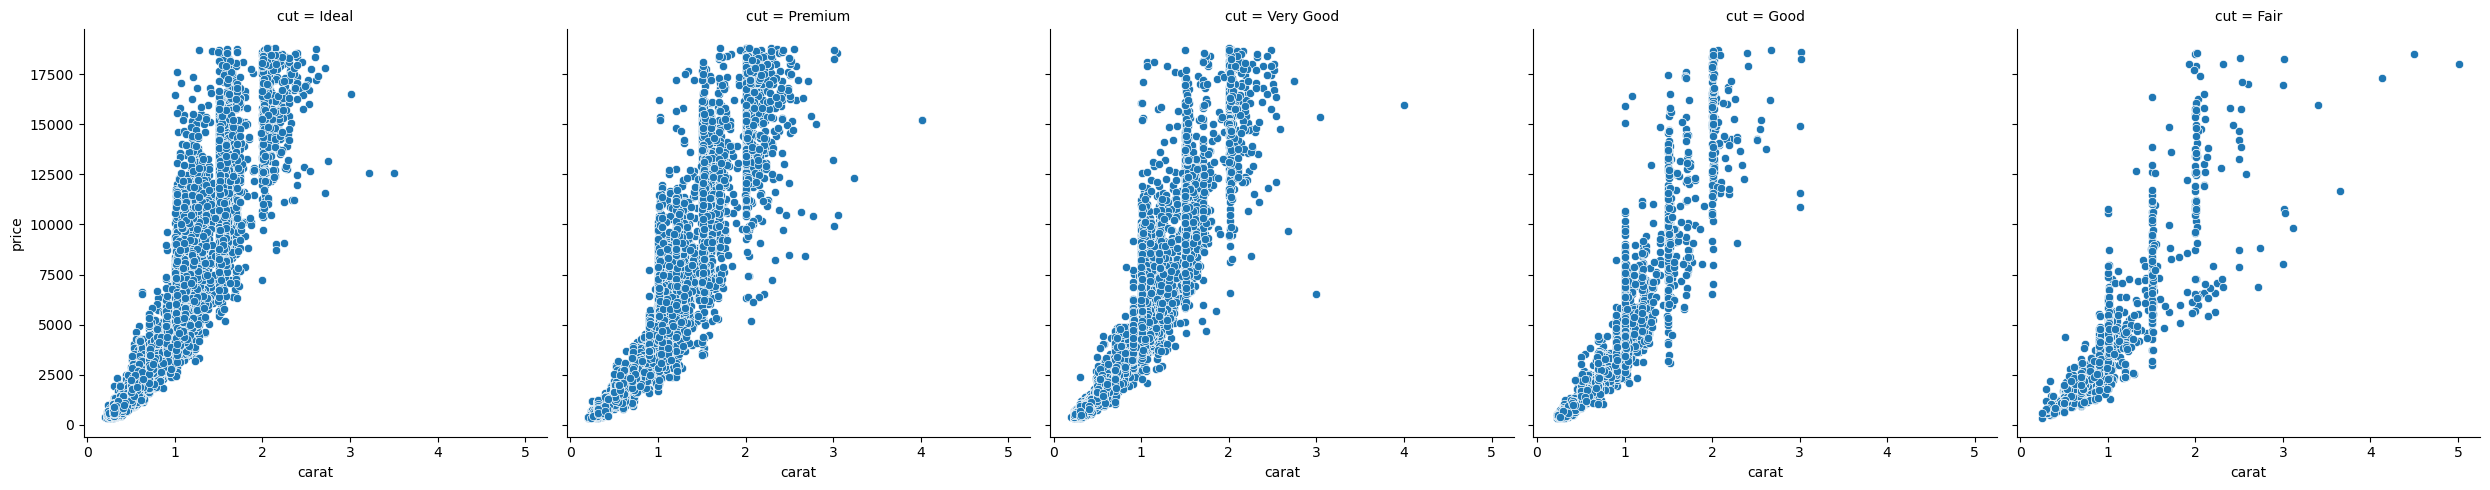

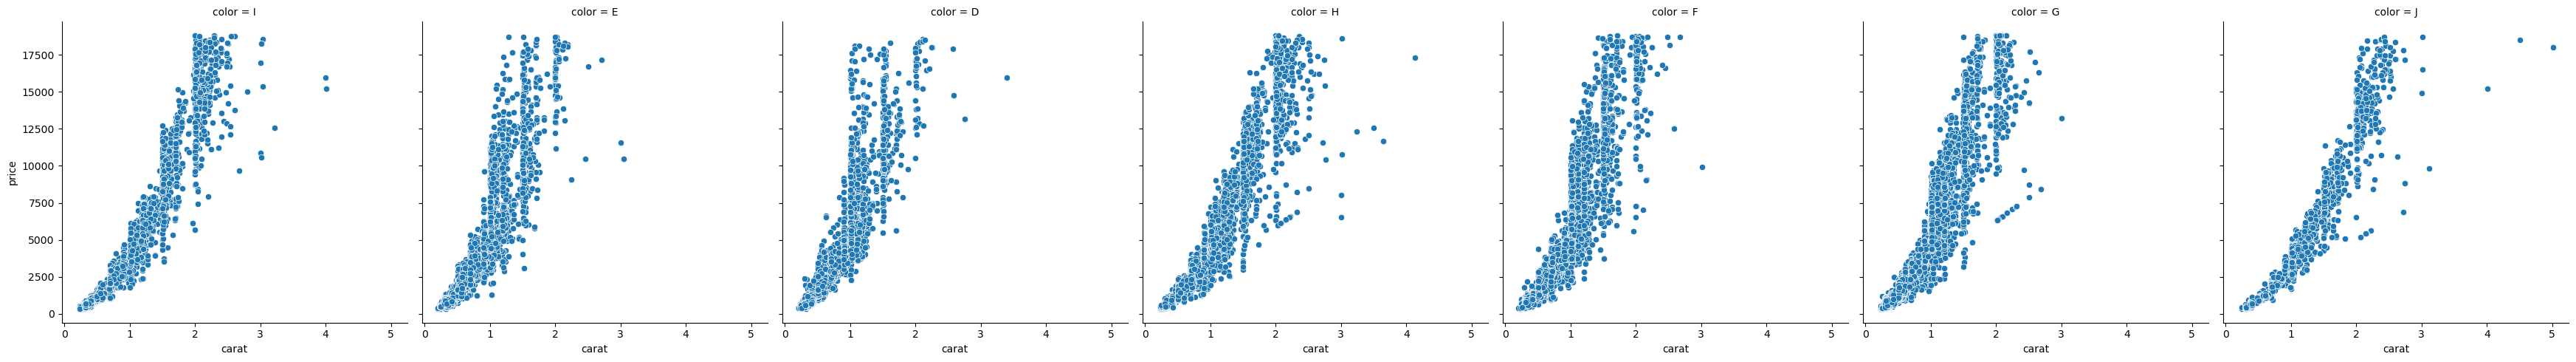

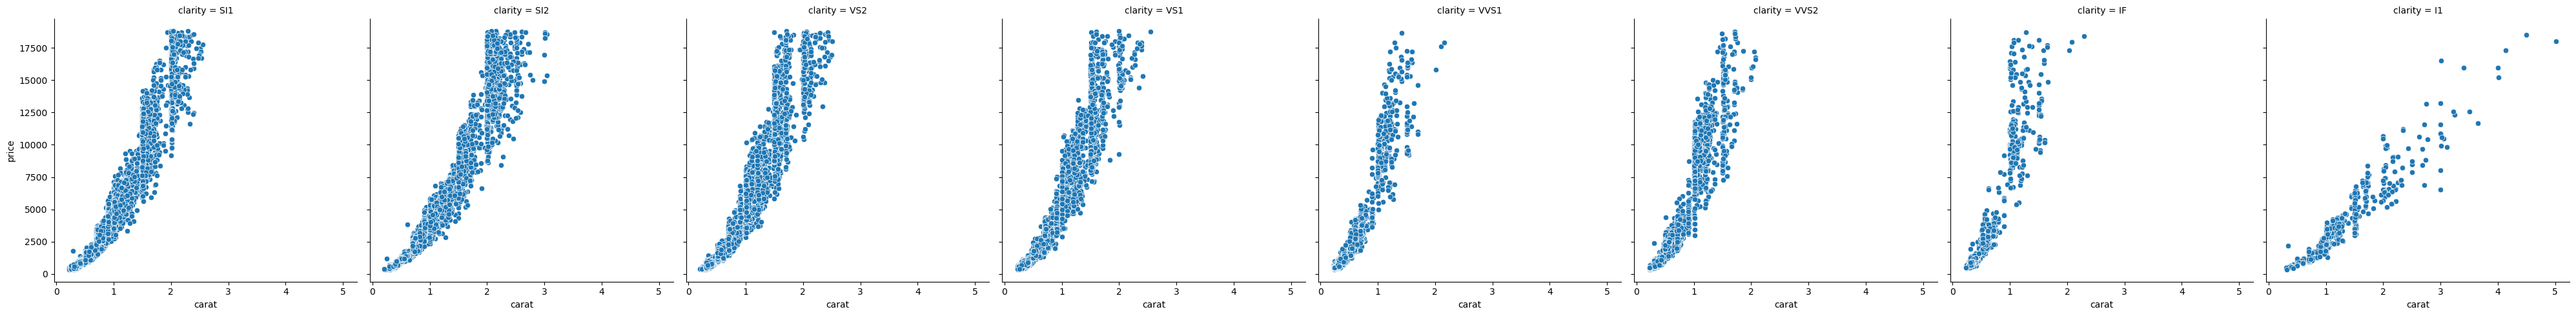

In [18]:
sns.relplot(data = df, x = 'carat', y = 'price', col = 'cut', kind = 'scatter');
sns.relplot(data = df, x = 'carat', y = 'price', col = 'color', kind = 'scatter');
sns.relplot(data = df, x = 'carat', y = 'price', col = 'clarity', kind = 'scatter'); # квадратичая зависимость 

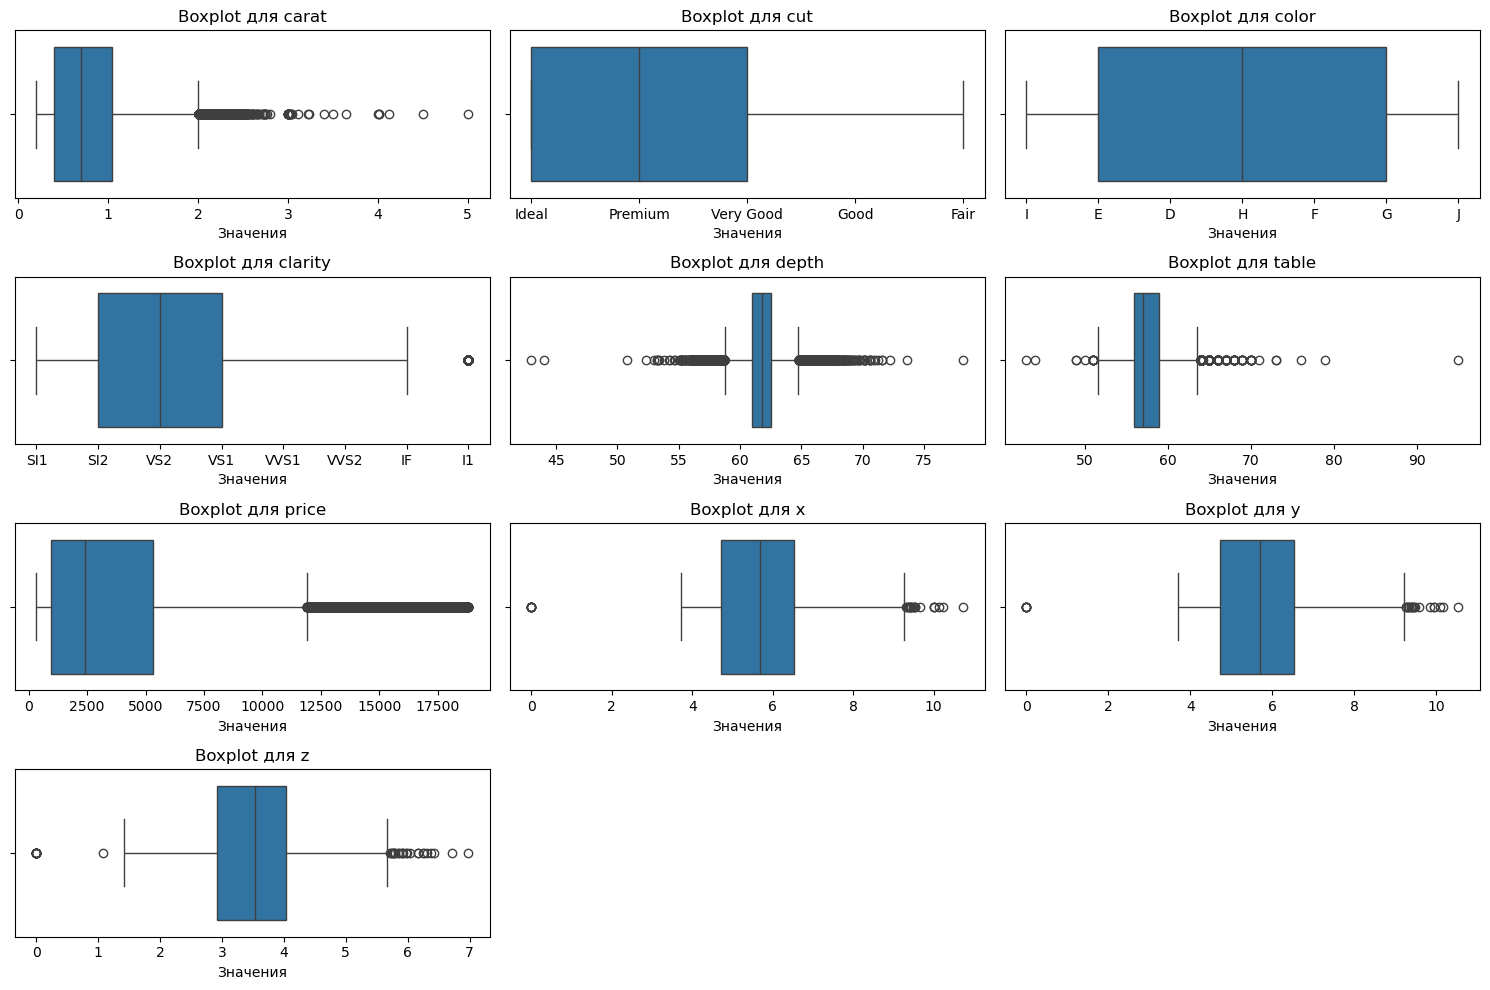

In [19]:
nrows = 4  
ncols = 3  
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot для {col}')
    axes[i].set_xlabel('Значения')

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [20]:
clarity_map = {'IF': 8, 'VVS1': 7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1': 3, 'SI2': 2, 'I1': 1}
color_map = {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}
cut_map = {'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}


transformer_clarity = Pipeline(steps=[
    ('encoder', ce.OrdinalEncoder(mapping=[{'col': 'clarity', 'mapping': clarity_map}])),
    ('scaler', StandardScaler()) 
])

transformer_color = Pipeline(steps=[
    ('encoder', ce.OrdinalEncoder(mapping=[{'col': 'color', 'mapping': color_map}])),
    ('scaler', MinMaxScaler())
])

transformer_cut = Pipeline(steps=[
    ('encoder', ce.OrdinalEncoder(mapping=[{'col': 'cut', 'mapping': cut_map}])),
    ('scaler', MinMaxScaler())
])


transformer_numeric = Pipeline(steps=[
    ('imputer',KNNImputer(missing_values=0, add_indicator=False, n_neighbors = 4, weights = "uniform")),
    ('scaler', MinMaxScaler())  
])

transformer_carat = Pipeline(steps=[
    ('scaler', RobustScaler())
])

# Преобразователь для 'carat' с полиномиальными признаками
transformer_carat_poly = Pipeline(steps=[
    # ('binner', KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile')), 
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', MinMaxScaler())  
])

# Преобразователь для объема (x * y * z) 
transformer_volume = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('scaler', MinMaxScaler())
])


# Сборка ColumnTransformer
CT = ColumnTransformer([
    ("clarity", transformer_clarity, ['clarity']),
    ("color", transformer_color, ['color']),
    ("cut", transformer_cut, ['cut']),
   ("numeric", transformer_numeric, ['x', 'y', 'z']),  # числовые признаки, кроме 'carat'
    ("carat", transformer_carat, ['carat']),
    ("carat_poly", transformer_carat_poly, ['carat']),  # полиномиальные признаки для 'carat'
    ("volume", transformer_volume, ['x', 'y', 'z'])# добавляем объем x*y*z
])


In [21]:
# df.drop(['depth', 'table'], axis=1, inplace=True) # не повлияло на кнн

In [22]:
# Функция оценки
def mse_irq(y_true, y_pred):
    delta = y_pred - y_true
    q_25 = np.quantile(delta, 0.25)
    q_75 = np.quantile(delta, 0.75)
    irq = q_75 - q_25
    mask = (delta < q_25 - 1.5 * irq) | (delta > q_75 + 1.5 * irq)
    if delta[mask].sum() == 0:
        result = 0
    else:
        result = -np.sum((delta[mask])**2) / len(delta[mask])
    return result

# Создаем scorer
scoring_mse_irq = make_scorer(mse_irq, greater_is_better=True)

In [23]:
#ие модели
X = df.drop("price", axis=1)
y = df["price"]

# Модели и параметры
models = {
    "KNeighborsRegressor": (KNeighborsRegressor(), {
        "regressor__n_neighbors": [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20],
        "regressor__weights": ['uniform', 'distance'],
        "regressor__metric": ['euclidean', 'manhattan', 'minkowski']
    }),
    "RANSACRegressor": (RANSACRegressor(estimator=Ridge()), {
        "regressor__estimator__alpha": [0.1, 1.0, 10.0],
        "regressor__min_samples": [0.2, 0.5, 0.7],
        "regressor__residual_threshold": [0.1, 0.5, 1.0]
    }),
    "Ridge": (Ridge(), {
        "regressor__alpha": [0.1, 1.0, 10.0]
    }),
    "Lasso": (Lasso(), {
        "regressor__alpha": [0.1, 1.0, 10.0]
    }),
    # "SVR": (SVR(), {
    #     "regressor__C": [0.1, 1.0, 10.0],  # Регуляризация
    #     "regressor__epsilon": [0.01, 0.1, 0.5],  # Размер "щели"
    #     "regressor__kernel": ['linear', 'poly', 'rbf'],  # Ядро
    #     "regressor__degree": [2, 3, 4],  # Степень полинома, используется для полиномиального ядра
    #     "regressor__gamma": ['scale', 'auto']  # Параметр гамма для 'rbf' и 'poly'
    # })
}

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

# Словарь для хранения результатов
results = {}

# Обучение моделей и подбор параметров
for model_name, (model, param_grid) in models.items():
    # Создаем pipeline
    pipeline = Pipeline(steps=[
        ("preprocessor", CT),  # Убедитесь, что CT корректно работает
        ("regressor", model)
    ])
    
    # Инициализируем GridSearchCV
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring=scoring_mse_irq, verbose=0, n_jobs=-1)
    
    # Запускаем GridSearch
    grid_search.fit(X_train, y_train)
    
    # Лучшая модель и предсказание
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Оценка модели по метрике mse_irq
    mse_irq_score = mse_irq(y_test, y_pred) 
    results[model_name] = {
        "best_params": grid_search.best_params_,
        "mse_irq": mse_irq_score
    }

# Вывод всех комбинаций параметров и результатов кросс-валидации
    print(f"\n{model_name} - результаты всех параметров:")
    for mean_score, params in zip(grid_search.cv_results_["mean_test_score"], grid_search.cv_results_["params"]):
        print(f"Параметры: {params}, Среднее значение метрики MSE_IRQ: {mean_score:.2f}")

# Вывод лучших результатов
print("\nЛучшие результаты:")
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Лучшие параметры: {result['best_params']}")
    print(f"  MSE_IRQ Score: {result['mse_irq']:.2f}")  


/Users/alinaohina/Downloads/folderanaconda/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



KNeighborsRegressor - результаты всех параметров:
Параметры: {'regressor__metric': 'euclidean', 'regressor__n_neighbors': 3, 'regressor__weights': 'uniform'}, Среднее значение метрики MSE_IRQ: -1989982.53
Параметры: {'regressor__metric': 'euclidean', 'regressor__n_neighbors': 3, 'regressor__weights': 'distance'}, Среднее значение метрики MSE_IRQ: -1981048.22
Параметры: {'regressor__metric': 'euclidean', 'regressor__n_neighbors': 4, 'regressor__weights': 'uniform'}, Среднее значение метрики MSE_IRQ: -1983213.36
Параметры: {'regressor__metric': 'euclidean', 'regressor__n_neighbors': 4, 'regressor__weights': 'distance'}, Среднее значение метрики MSE_IRQ: -1924846.79
Параметры: {'regressor__metric': 'euclidean', 'regressor__n_neighbors': 5, 'regressor__weights': 'uniform'}, Среднее значение метрики MSE_IRQ: -1975540.49
Параметры: {'regressor__metric': 'euclidean', 'regressor__n_neighbors': 5, 'regressor__weights': 'distance'}, Среднее значение метрики MSE_IRQ: -1904414.44
Параметры: {'reg

/Users/alinaohina/Downloads/folderanaconda/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/alinaohina/Downloads/folderanaconda/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/alinaohina/Downloads/folderanaconda/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/alinaohina/Downloads/folderanaconda/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/alinaohina/Downloads/f


RANSACRegressor - результаты всех параметров:
Параметры: {'regressor__estimator__alpha': 0.1, 'regressor__min_samples': 0.2, 'regressor__residual_threshold': 0.1}, Среднее значение метрики MSE_IRQ: -40361639.61
Параметры: {'regressor__estimator__alpha': 0.1, 'regressor__min_samples': 0.2, 'regressor__residual_threshold': 0.5}, Среднее значение метрики MSE_IRQ: -17210349.10
Параметры: {'regressor__estimator__alpha': 0.1, 'regressor__min_samples': 0.2, 'regressor__residual_threshold': 1.0}, Среднее значение метрики MSE_IRQ: -16533566.79
Параметры: {'regressor__estimator__alpha': 0.1, 'regressor__min_samples': 0.5, 'regressor__residual_threshold': 0.1}, Среднее значение метрики MSE_IRQ: -35292220.65
Параметры: {'regressor__estimator__alpha': 0.1, 'regressor__min_samples': 0.5, 'regressor__residual_threshold': 0.5}, Среднее значение метрики MSE_IRQ: -17970673.03
Параметры: {'regressor__estimator__alpha': 0.1, 'regressor__min_samples': 0.5, 'regressor__residual_threshold': 1.0}, Среднее зн

/Users/alinaohina/Downloads/folderanaconda/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Ridge - результаты всех параметров:
Параметры: {'regressor__alpha': 0.1}, Среднее значение метрики MSE_IRQ: -13015350.65
Параметры: {'regressor__alpha': 1.0}, Среднее значение метрики MSE_IRQ: -14464454.70
Параметры: {'regressor__alpha': 10.0}, Среднее значение метрики MSE_IRQ: -16277820.95


/Users/alinaohina/Downloads/folderanaconda/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/alinaohina/Downloads/folderanaconda/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.289e+10, tolerance: 4.123e+07
  model = cd_fast.enet_coordinate_descent(
/Users/alinaohina/Downloads/folderanaconda/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.506e+10, tolerance: 4.100e+07
  model = cd_fast.enet_coord


Lasso - результаты всех параметров:
Параметры: {'regressor__alpha': 0.1}, Среднее значение метрики MSE_IRQ: -13197605.63
Параметры: {'regressor__alpha': 1.0}, Среднее значение метрики MSE_IRQ: -15807292.20
Параметры: {'regressor__alpha': 10.0}, Среднее значение метрики MSE_IRQ: -16995596.18

Лучшие результаты:
KNeighborsRegressor:
  Лучшие параметры: {'regressor__metric': 'euclidean', 'regressor__n_neighbors': 11, 'regressor__weights': 'distance'}
  MSE_IRQ Score: -1639002.41
RANSACRegressor:
  Лучшие параметры: {'regressor__estimator__alpha': 0.1, 'regressor__min_samples': 0.5, 'regressor__residual_threshold': 1.0}
  MSE_IRQ Score: -15003126.36
Ridge:
  Лучшие параметры: {'regressor__alpha': 0.1}
  MSE_IRQ Score: -12662503.61
Lasso:
  Лучшие параметры: {'regressor__alpha': 0.1}
  MSE_IRQ Score: -12822724.47


/Users/alinaohina/Downloads/folderanaconda/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.240e+10, tolerance: 5.146e+07
  model = cd_fast.enet_coordinate_descent(


In [24]:
# Создание экземпляра KNeighborsRegressor с нужными параметрами
knn_model = KNeighborsRegressor(n_neighbors=11, weights= 'distance', metric='euclidean')

# Создание pipeline, как и раньше, с заменой модели
model = Pipeline(steps=[
    ("preprocessor", CT),
    ("regressor", knn_model)
])

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

# Обучение модели
model.fit(X_train, y_train)

# Получение предсказаний
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse_irq_value = mse_irq(y_test, y_pred)


# Вывод результатов
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")
print(f"Mean Squared Error (IRQ-based): {mse_irq_value}")

Mean Squared Error (MSE): 319407.30123211106
Mean Absolute Error (MAE): 287.376699247049
R^2 Score: 0.9802724602299029
Mean Squared Error (IRQ-based): -1639002.4146610785
